In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data

Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
mnist = input_data.read_data_sets('data/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### 简单的二层神经网络

In [5]:
# NETWORK TOPOLOGIES
learning_rate = 0.01
training_epochs = 20
batch_size = 100
display_step = 4
n_hidden_1 = 256
n_hidden_2 = 128 
n_input = 784 
n_classes = 10  
stddev = 0.1 

In [6]:
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])
parameters = {}
parameters['W1'] = tf.Variable(tf.random_normal([n_input, n_hidden_1], stddev=stddev))
parameters['W2'] = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2], stddev=stddev))
parameters['W3'] = tf.Variable(tf.random_normal([n_hidden_2, n_classes], stddev=stddev))
parameters['b1'] = tf.Variable(tf.random_normal([n_hidden_1]))
parameters['b2'] = tf.Variable(tf.random_normal([n_hidden_2]))
parameters['b3'] = tf.Variable(tf.random_normal([n_classes]))
print('')

In [7]:
def forward_process(X, parameters):
    A = X
    L = len(parameters)//2
    for l in range(1, L+1):
        W = parameters['W' + str(l)]
        b = parameters['b' + str(l)]
        Z = tf.add(tf.matmul(A, W), b)
        A = tf.nn.relu(Z)
    return A

In [11]:
#定义前向传播过程
pred = forward_process(x, parameters)
#定义损失函数
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred))
#优化方式
optm = tf.train.GradientDescentOptimizer(learning_rate)
#目标
train = optm.minimize(cost)
#评估
coret = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accr = tf.reduce_mean(tf.cast(coret, 'float'))

init = tf.global_variables_initializer()
print('ready')

ready


In [12]:
with tf.Session() as sess:
    sess.run(init)
    num_batches = mnist.train.num_examples//batch_size
    costs = []
    for epoch in range(training_epochs):
#         cost_now = []
        for i in range(num_batches):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            foods = {x:batch_x, y:batch_y}
            sess.run(train, feed_dict=foods)
            cost_ = sess.run(cost, feed_dict=foods)
            costs.append(cost_)
        if (epoch+1)%5 == 0:
            feeds = {x: mnist.test.images, y: mnist.test.labels}
            test_acc = sess.run(accr, feed_dict=feeds)
            print ("TEST ACCURACY: %.3f" % (test_acc))
    print ("OPTIMIZATION FINISHED")

TEST ACCURACY: 0.918
TEST ACCURACY: 0.935
TEST ACCURACY: 0.945
TEST ACCURACY: 0.953
OPTIMIZATION FINISHED


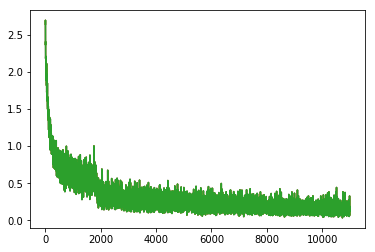

In [15]:
plt.plot(costs)
plt.show()

In [20]:
with tf.Session() as sess:
    sess.run(init)
    num_batchs = int(mnist.train.num_examples/batch_size)
    for epoch in range(training_epochs):
        aver_cost = 0
        for i in range(num_batchs):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            foods = {x:batch_xs, y:batch_ys}
            sess.run(train, feed_dict=foods)
            aver_cost += sess.run(cost, feed_dict=foods)
        aver_cost /= num_batchs
        if (epoch+1) % display_step == 0:
            print ("Epoch: %03d/%03d cost: %.9f" % (epoch, training_epochs, aver_cost))
            feeds = {x: mnist.test.images, y: mnist.test.labels}
            test_acc = sess.run(accr, feed_dict=feeds)
            print ("TEST ACCURACY: %.3f" % (test_acc))
    print ("OPTIMIZATION FINISHED")

Epoch: 003/020 cost: 2.262182090
TEST ACCURACY: 0.254
Epoch: 007/020 cost: 2.223892411
TEST ACCURACY: 0.396
Epoch: 011/020 cost: 2.180194215
TEST ACCURACY: 0.459
Epoch: 015/020 cost: 2.129456278
TEST ACCURACY: 0.503
Epoch: 019/020 cost: 2.070220598
TEST ACCURACY: 0.550
OPTIMIZATION FINISHED
